In [1]:
import math
import statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
from umap import UMAP

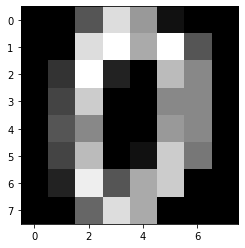

In [3]:
data = load_digits()
plt.imshow(data.data[0].reshape(8, 8), cmap='gray');

In [4]:
data.data = StandardScaler().fit_transform(data.data)

In [5]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(data.data)

In [6]:
sum(pca.explained_variance_ratio_)

0.21594970497994953

In [7]:
df = pd.DataFrame(np.column_stack((transformed, data.target)), columns=['x', 'y', 'target']).astype({'target': np.int16})
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1797   │ │ float64     │ 2     │                                    │
│ │ Number of columns │ 3      │ │ int16       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃        ┃ missing ┃ complete     ┃ mean     ┃ sd  ┃ p0   ┃ p25  ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃        ┃         ┃ rate         ┃          ┃     ┃      ┃      ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ x      │       0 │            1 │ -1.6e-16 │ 2.7 │   -7 │ -1.9 │ 1.7 │   10 │ ▁▅█▄▁  │  │
│ │ y      │       0 │            1 │  1.7e-16 │ 2.4 │ -6.7 │ -1.5 │ 1.5 │  9.9 │ ▁▄█▃▁  │  │
│ │ target │       0 │            1 │      4.5 │ 2.9 │    0 │    2 │   7 │    9 │ █▄█▄██ │  │
│ └────────┴─────────┴──────────────┴──────────┴─────┴──────┴──────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

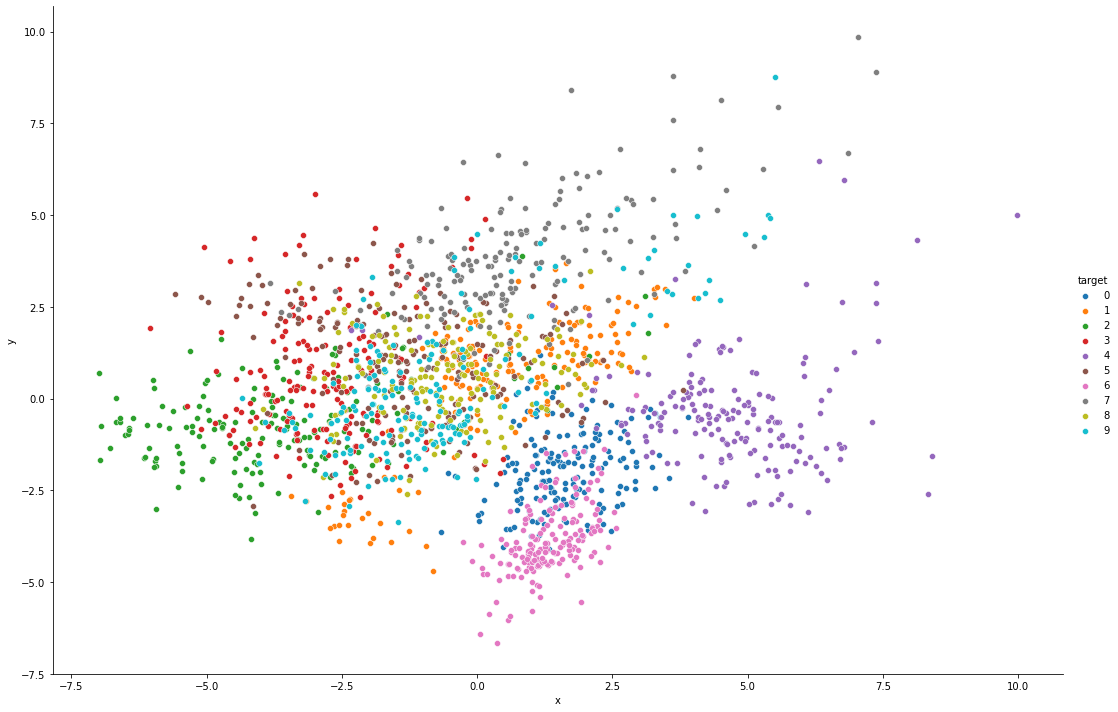

In [8]:
grid = sns.FacetGrid(df, hue='target', height=10, aspect=1.5)
grid.map(sns.scatterplot, 'x', 'y').add_legend();

In [9]:
tsne = TSNE()
transformed = tsne.fit_transform(data.data)

/home/mahyar/Works/ShittyStuff/Wes/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mahyar/Works/ShittyStuff/Wes/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
df = pd.DataFrame(np.column_stack((transformed, data.target)), columns=['x', 'y', 'target']).astype({'target': np.int16})
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1797   │ │ float64     │ 2     │                                    │
│ │ Number of columns │ 3      │ │ int16       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing  ┃ complete rate  ┃ mean   ┃ sd  ┃ p0  ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ x       │        0 │              1 │  -0.12 │  27 │ -60 │ -17 │  15 │   59 │ ▂▃▆█▂▃ │  │
│ │ y       │        0 │              1 │   0.27 │  31 │ -53 │ -22 │  19 │   70 │ ▆▄▇█▁▃ │  │
│ │ target  │        0 │              1 │    4.5 │ 2.9 │   0 │   2 │   7 │    9 │ █▄█▄██ │  │
│ └─────────┴──────────┴────────────────┴────────┴─────┴─────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

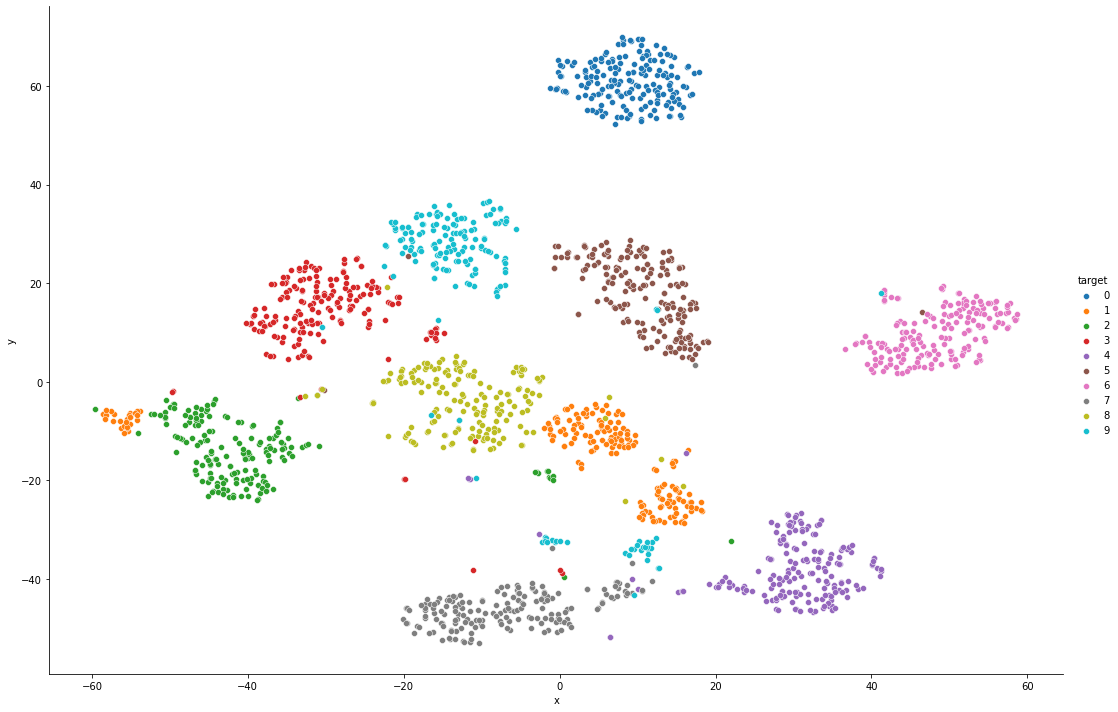

In [11]:
grid = sns.FacetGrid(df, hue='target', height=10, aspect=1.5)
grid.map(sns.scatterplot, 'x', 'y').add_legend();

In [26]:
umap = UMAP()
transformed = umap.fit_transform(data.data)

In [27]:
df = pd.DataFrame(np.column_stack((transformed, data.target)), columns=['x', 'y', 'target']).astype({'target': np.int16})
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1797   │ │ float64     │ 2     │                                    │
│ │ Number of columns │ 3      │ │ int16       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃         ┃ missing  ┃ complete rate  ┃ mean  ┃ sd  ┃ p0   ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ x       │        0 │              1 │     8 │ 5.6 │ -4.7 │ 6.2 │  12 │   17 │ ▂▂ ▅█▂ │  │
│ │ y       │        0 │              1 │   5.5 │ 5.9 │   -5 │ 2.2 │ 9.2 │   16 │ ▆▁█▇▃▅ │  │
│ │ target  │        0 │              1 │   4.5 │ 2.9 │    0 │   2 │   7 │    9 │ █▄█▄██ │  │
│ └─────────┴──────────┴────────────────┴───────┴─────┴──────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

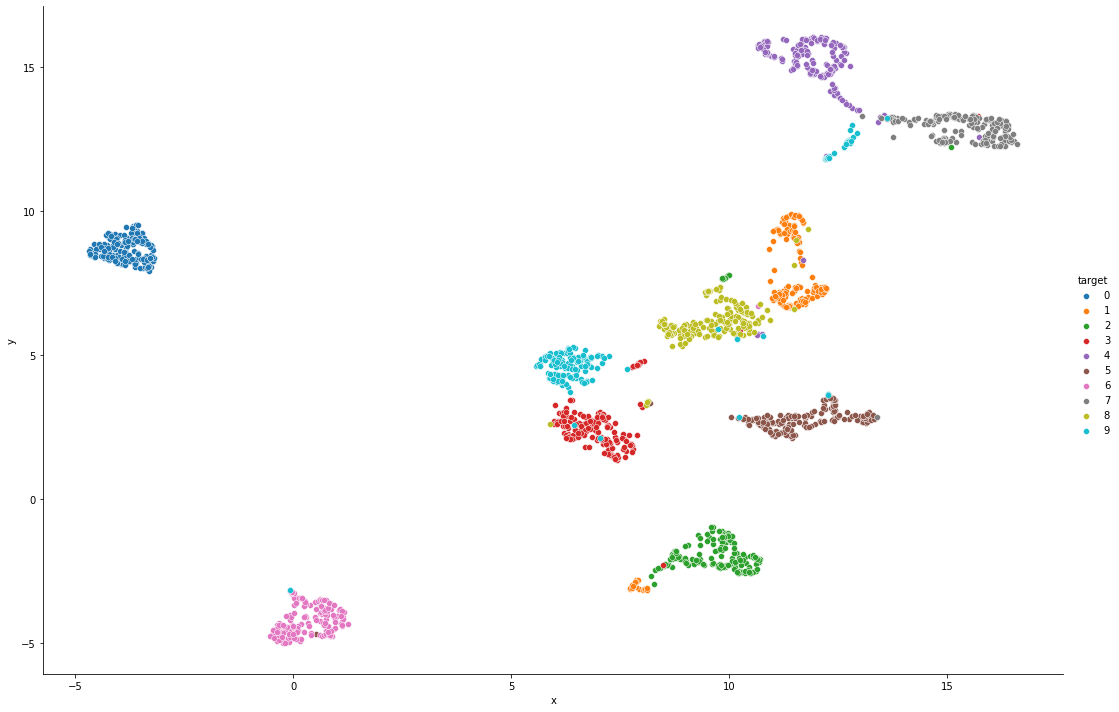

In [28]:
grid = sns.FacetGrid(df, hue='target', height=10, aspect=1.5)
grid.map(sns.scatterplot, 'x', 'y').add_legend();